<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../Assets/ATLASOD.gif" style="width:50%"></a>
</CENTER>

# <center> Cálculo de la masa de los Bosones Z </center> 
##  <center> Z-> e+e- </center>

<CENTER><img src="../Assets/Z_ElectronPositron.png" style="width:30%"></CENTER>

El experimento realizado para poder calcular la masa del bosón Z se denominó "Experimento Atlas", este consistió en la colisión de dos protones a velocidades ultrarelativistas (muy cercanas a la velocidad de la luz). 

Un protón está constituido por dos quarks "up" y un quark "down", los cuales se mantienen unidos gracias a una partícula denominada "gluón".
Cuando los protones se encuentran extremadamente cerca y se superponen, un gluón puede transformarse en en un quark y un antiquark. Este antiquark interactúa con un quark de alguno de ambos protones, dando resultado al bosón Z que decae, prácticamente, de inmediato en dos leptones. Estos leptones son detectados, lo que nos permite deducir la formación del bosón Z

La importancia de la detección del bosón Z recae en que esta es la partícula asociada a la interacción por fuerza nuclear débil (así como los bosones W), la fuerza nuclear débil es efectiva en rangos del orden de (10^-18 metros) y desaparece casi por completo para distancias superiores al radio de un protón

Para este cálculo trabajaremos con el decaimiento de los bosones Z. 

Para este fin debemos tener en cuenta algunas condiciones iniciales.

1° Buscamos que decaiga en exactamente en 2 leptones.

2° Los bosones z no poseen carga, por lo que los leptones en los que decae deben tener una carga neta igual a cero.        

3° Los leptones deben ser del mismo tipo

En este proceso tomaremos en cuenta, ademas, la conservación de energía que nos permitirá calcular la masa (en GeV) inicial del 
Bosón Z. 
Tendremos: <center> M(Z)=M(leptón_1) + M(Leptón_2) </center>

##### Como primer paso: importaremos la librearía "ROOT". Esta librearia nos permitirá analizar los datos obtenidos de ATLAS

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/08


Ahora abriremos la data que deseamos analizar. La data se puede usar descargandose en tiempo real desde el servidor web o, también, se la puede descargar previamente en caso el internet no sea de velocidad conveniente.

Esta data posee una cantidad de 125000 eventos, donde se buscó detectar al bosón Z

In [2]:
## f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105986.ZZ.root")
f = ROOT.TFile.Open("mc_105986.ZZ.root")

##### En la línea comentada de la celda que se encuentra encima observamos el comando para abrir desde la red el archivo, sin necesidad de descargarlo

Ahora crearemos un "canvas". Básicamente es el "lienzo" donde se formarán los histogramas deseados.
Le pondremos el nombre de "Canvas", con encabezado "c", resolución.

In [3]:
canvas = ROOT.TCanvas("Canvas","c",1000,1000)

El siguiente comando nos permite crear un "tree", que es el "árbol" de donde se sacará toda la información del archivo ".root"

In [4]:
tree = f.Get("mini")

A continuación crearemos los histogramas necesarios para nuestros análisis. Se colocan las variables, encabezado, abcisas, ordenadas, pasos, punto inicial, punto final.

In [5]:
hist1 = ROOT.TH1F("lep_n=2","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist2 = ROOT.TH1F("lep_n>2","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist3 = ROOT.TH1F("lep_n>=2","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist4 = ROOT.TH1F("abs(eta)>4","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist5 = ROOT.TH1F("abs(eta)<0.25","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist6 = ROOT.TH1F("Trail_E~0.9%Lead_E","Mass of the Z boson; mass [GeV]; events",30,40,140)
hist7 = ROOT.TH1F("hist7","Mass of the Z boson; mass [GeV]; events",30,80,100)

###### TIP: colocar distintos nombres a las variables para no crear un error en la memoria

Con todo esto, tenemos lo necesario para los histogramas. A continuación nos faltaría datos con que llenarlos. 
Para este fin haremos uso de comandos ROOT para el análisis de los datos y que condiciones escogeremos para la elección de los mismo.

Para lograr esto debemos definir algunos vectores de lorentz, estos son vectores con 4 componentes:

1° Momento transversal(Pt) 

2° Pseudorapidez (eta)

n=-ln(tan(theta/2))

<Center><img src="Pseudorapidity.svg.png" style="width:30%"></Center>

3° Angulo azimutal (phi)

4° Energía (E).

Además colocaremos las condiciones iniciales mencionadas al inicio.
Finalmente, sumaremos la masa de los leptones seleccionados (ya que será la masa invariante del bosón Z).

Para estos fines usaremos varios comandos de la librería ROOT que nos permitirá cumplir nuestro objetivoes

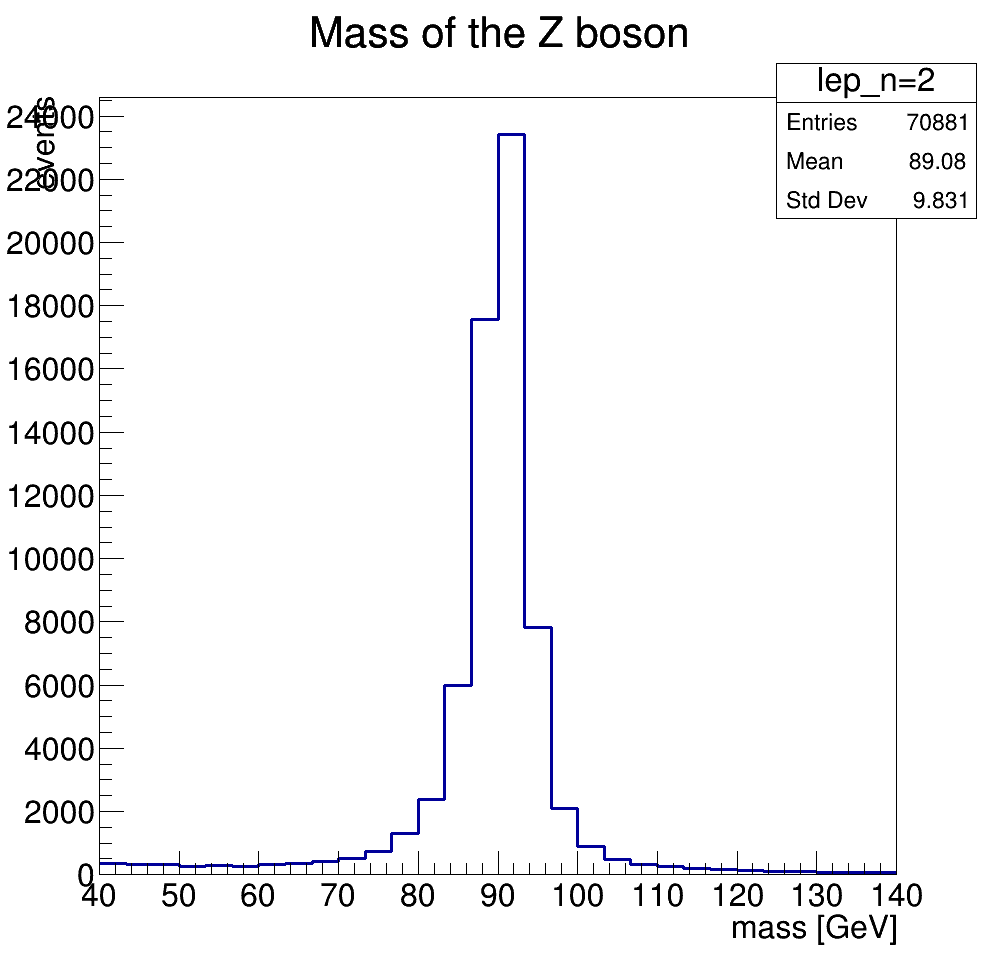

89.0755886953613

In [6]:
leadLepton  = ROOT.TLorentzVector() #definimos vectores de Lorentz con los nombres lead(primero), trail(segundo)
trailLepton = ROOT.TLorentzVector()

for event in tree: #aquí definimos nuestra variable que irá avanzando en nuestro "árbol"
    
    # primera condición: que se encuentren más de 2 leptones
    if tree.lep_n == 2:
        
        # segunda condición: leptones de cargas distintas
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # tercera condición: Que los leptones sean del mismo tipo
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # definimos un vector de lorentz para cada leptón, es decir, dos vectores
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # como el vector de lorentz es un cuadrivector, se han definido cuatro variables: momento, ángulo eta, ángulo phi
                # y la energía
                # Finalmente, la masa que deseamos calcular será la suma de las masas de los dos leptops escogidos
                invmass = leadLepton + trailLepton
                
                hist1.Fill(invmass.M())
hist1.Draw()
canvas.Draw()
hist1.GetMean()


Como podemos observar, la masa del bosón Z será aproximadamente (en GeV) : 89.08

Pero pueden aparecer otros tipos de interacciones en el detector, sin interés en nuestro experimento. Algunas veces estas interacciones pueden parecerse lo suficiente a la producción de los bosones Z.

Estos procesos son referidos como "background"

A pesar de las condiciones que hemos colocado, la identificación no es perfecta puesto que es posible identificar una partícula de manera incorrecta. El próposito de colocar las condiciones es de reducir el "background" mientras se mantienen los eventos que identifican al bosón Z

A medida de ejemplo, cambiaremos la condición esencial (exactamente 2 leptones). La existencia de entradas, nos da un indicio claro de que se detectan más leptones posiblemente por el "background"

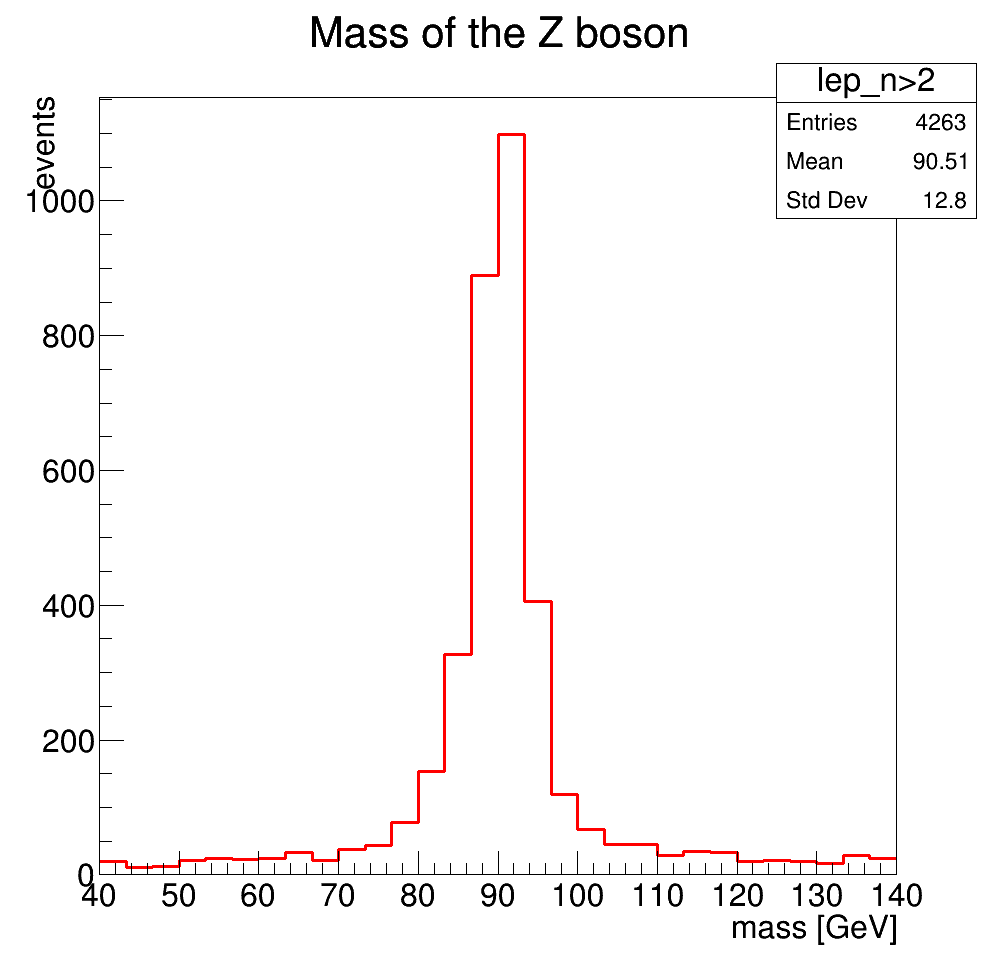

In [7]:
leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()

for event in tree: #aquí definimos nuestra variable que irá avanzando en nuestro "árbol"
    
    # primera condición: que se encuentren exactamente 2 leptones
    if tree.lep_n > 2:
        
        # segunda condición: leptones de cargas distintas
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # tercera condición: Que los leptones sean del mismo tipo
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # definimos un vector de lorentz para cada leptón, es decir, dos vectores
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # como el vector de lorentz es un cuadrivector, se han definido cuatro variables: momento, ángulo eta, ángulo phi
                # y la energía
                # Finalmente, la masa que deseamos calcular será la suma de las masas de los dos leptops escogidos
                invmass = leadLepton + trailLepton
                
                hist2.Fill(invmass.M())

hist2.SetLineColor(2)    
hist2.Draw()
canvas.Draw()

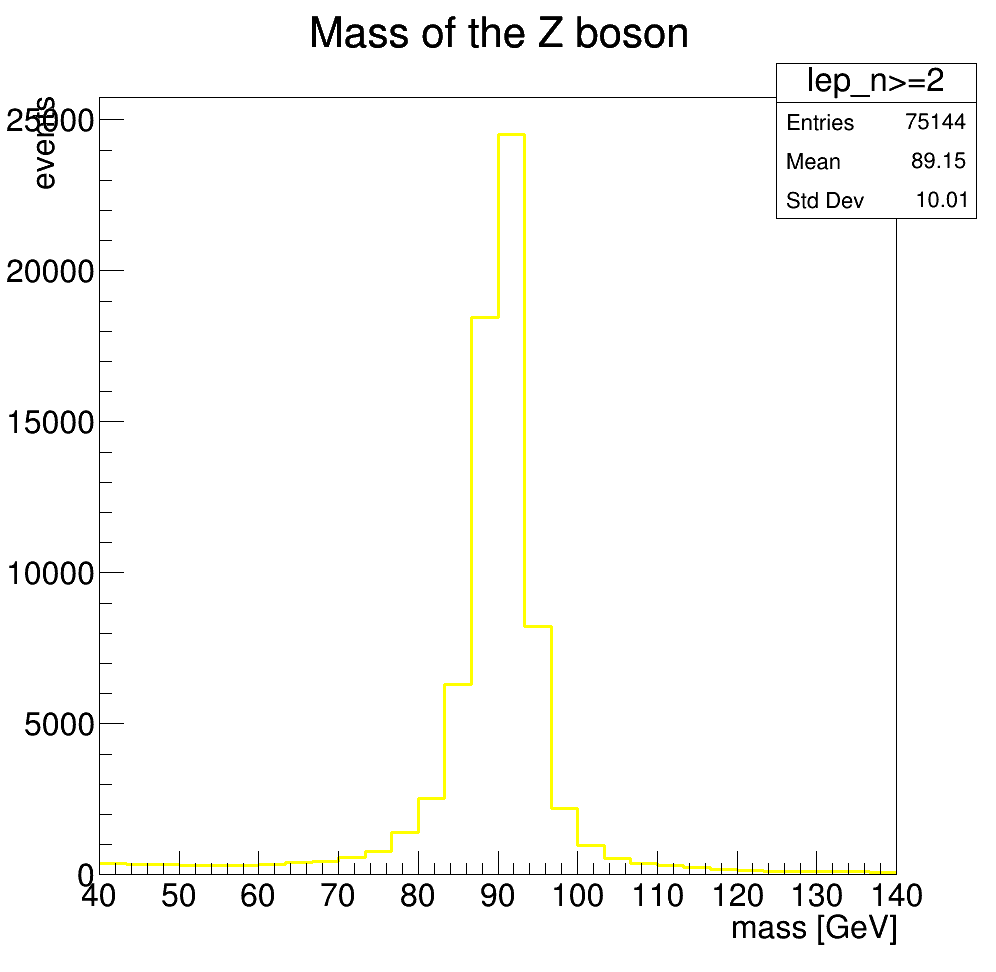

In [8]:
leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()

for event in tree: #aquí definimos nuestra variable que irá avanzando en nuestro "árbol"
    
    # primera condición: que se encuentren 2 o más leptones
    if tree.lep_n >= 2:
        
        # segunda condición: leptones de cargas distintas
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # tercera condición: Que los leptones sean del mismo tipo
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # definimos un vector de lorentz para cada leptón, es decir, dos vectores
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # como el vector de lorentz es un cuadrivector, se han definido cuatro variables: momento, ángulo eta, ángulo phi
                # y la energía
                # Finalmente, la masa que deseamos calcular será la suma de las masas de los dos leptops escogidos
                invmass = leadLepton + trailLepton             
                hist3.Fill(invmass.M())
                
hist3.SetLineColor(5)
hist3.Draw()
canvas.Draw()

#### Para asegurarnos que nuestros resultados tengan sentido, verificaremos que las entradas de los primeros dos histogramas sumen las entradas del tercer histograma

In [9]:
print(hist1.GetEntries()+hist2.GetEntries())
print(hist3.GetEntries())

75144.0
75144.0


Como observaremos en la siguiente condición, la gran mayoría de entradas se da para un parametro eta mayor a 4: si nos fijamos en la figura más arriba, esto es para un ángulo polar bastante bajo. Por lo que podemos entender que ambos leptones poseen trayectorias casi paralelas. 

Podemos deducir que se da en un sistema de referencia de laboratorio, ya que el momento inicial horizontal al momento de la creación del bosón Z se debe mantener luego de su decaimiento en dos leptones.

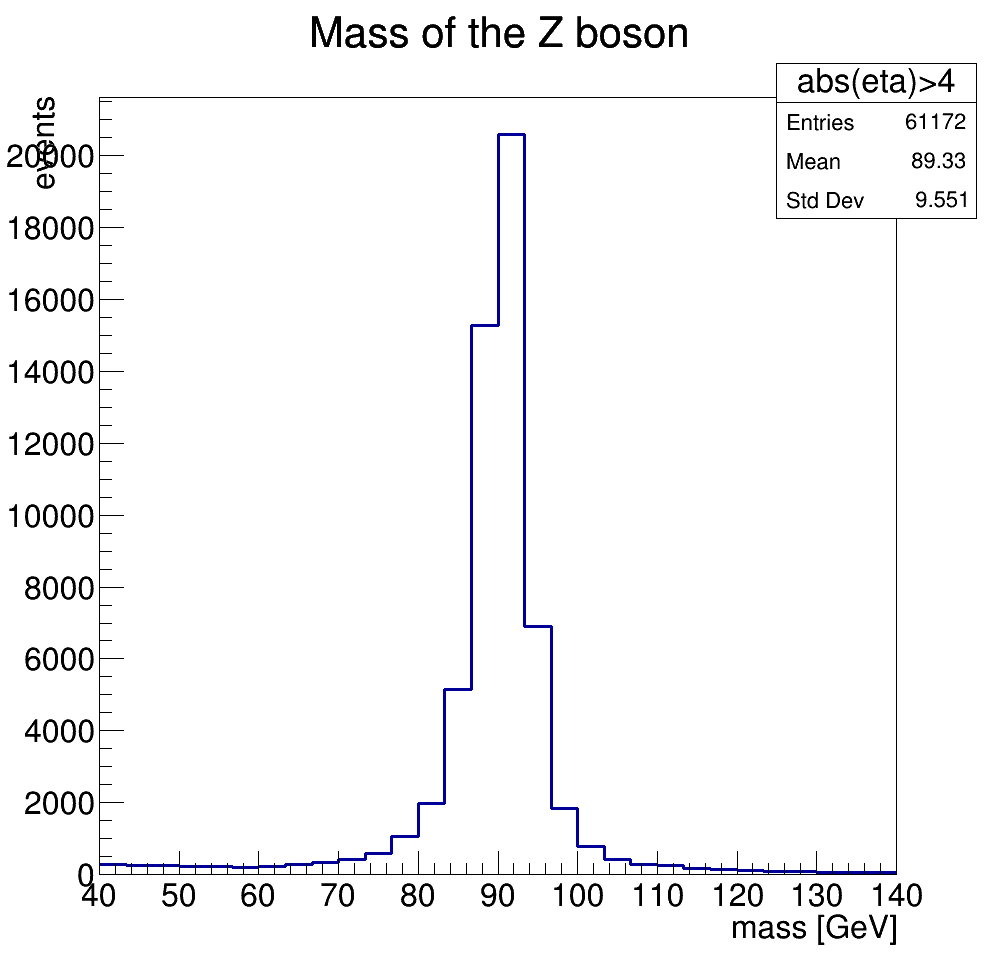

In [10]:
leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()

for event in tree: #aquí definimos nuestra variable que irá avanzando en nuestro "árbol"
    
    # primera condición: que se encuentren más de 2 leptones
    if tree.lep_n == 2:
        
        # segunda condición: leptones de cargas distintas
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # tercera condición: Que los leptones sean del mismo tipo
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # definimos un vector de lorentz para cada leptón, es decir, dos vectores
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # como el vector de lorentz es un cuadrivector, se han definido cuatro variables: momento, ángulo eta, ángulo phi
                # y la energía
                if abs(leadLepton[1])> 4 and abs(trailLepton[1]) > 4: #añadimos la condicion que el valor absoluto del ángulo
                                                                      #sea menor que dos para ambos leptones
                    
                # Finalmente, la masa que deseamos calcular será la suma de las masas de los dos leptops escogidos
                    invmass = leadLepton + trailLepton
                    #print(invmass.M())
                    hist4.Fill(invmass.M())
                    
hist4.Draw()
canvas.Draw()

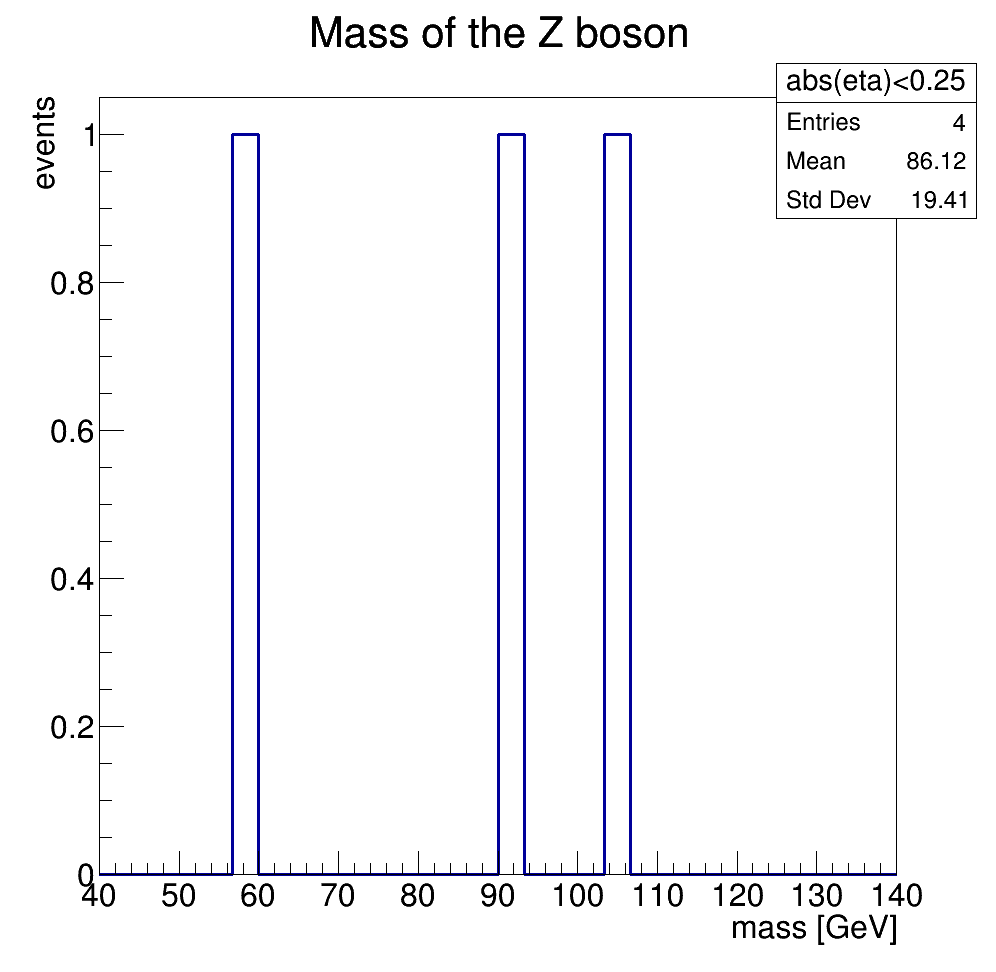

In [11]:
leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()

for event in tree: #aquí definimos nuestra variable que irá avanzando en nuestro "árbol"
    
    # primera condición: que se encuentren más de 2 leptones
    if tree.lep_n == 2:
        
        # segunda condición: leptones de cargas distintas
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # tercera condición: Que los leptones sean del mismo tipo
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # definimos un vector de lorentz para cada leptón, es decir, dos vectores
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # como el vector de lorentz es un cuadrivector, se han definido cuatro variables: momento, ángulo eta, ángulo phi
                # y la energía
                if abs(leadLepton[1]) < 0.25 and abs(trailLepton[1]) < 0.25: #añadimos la condicion que el valor absoluto del ángulo
                                                                      #sea mayor que dos para ambos leptones
                # Finalmente, la masa que deseamos calcular será la suma de las masas de los dos leptops escogido
                    invmass = leadLepton + trailLepton
                    hist5.Fill(invmass.M())

hist5.Draw()
canvas.Draw()

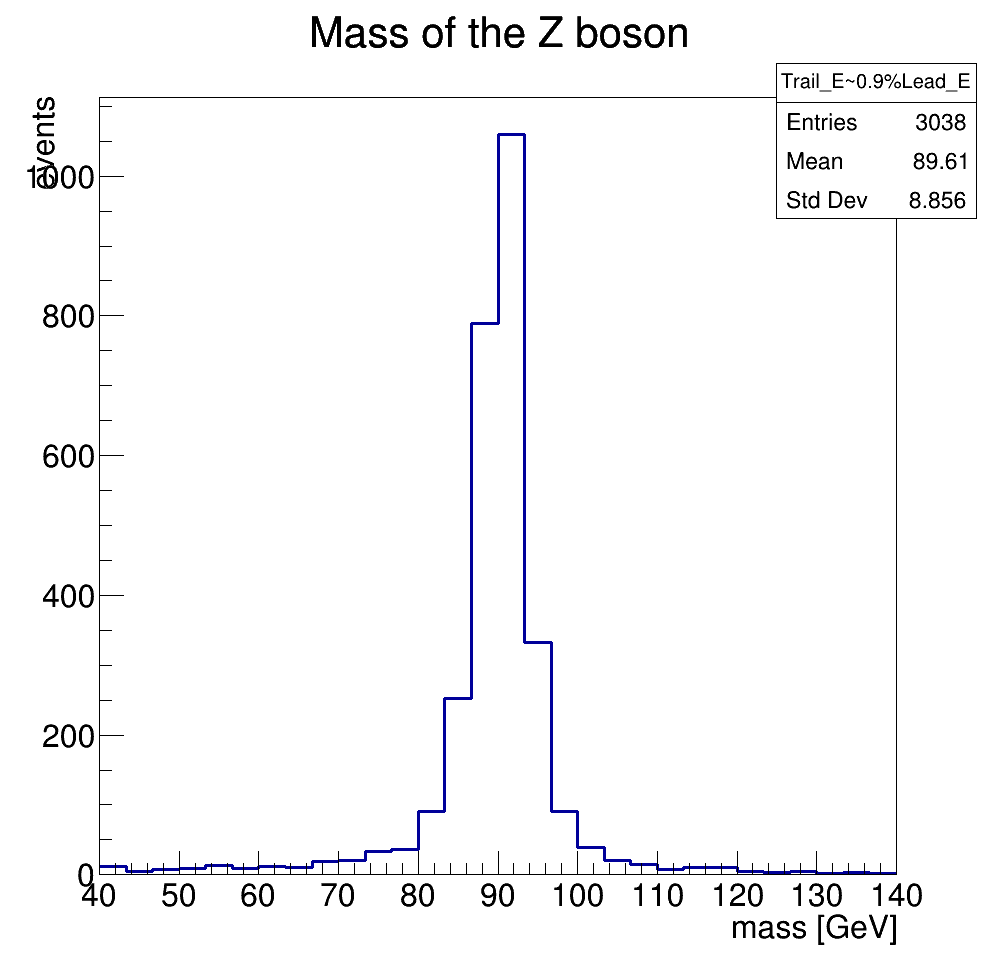

In [12]:
leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()
for event in tree: #aquí definimos nuestra variable que irá avanzando en nuestro "árbol"
    
    # primera condición: que se encuentren más de 2 leptones
    if tree.lep_n == 2:
        
        # segunda condición: leptones de cargas distintas
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # tercera condición: Que los leptones sean del mismo tipo
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # definimos un vector de lorentz para cada leptón, es decir, dos vectores
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # como el vector de lorentz es un cuadrivector, se han definido cuatro variables: momento, ángulo eta, ángulo phi
                # y la energía
                if 0.9*tree.lep_E[0]<=tree.lep_E[1]<=tree.lep_E[0] :#esta linea se encarga de identificar a los leptones 
                                                        #"secundarios" que poseen al menos 90% de energía del "primero"
                    invmass = leadLepton + trailLepton
                    hist6.Fill(invmass.M())
                    
hist6.Draw()
canvas.Draw()

#### Como último recurso, revisaremos los resultados obtenidos de la masa del bosón Z


In [13]:
print(hist1.GetMean())
print(hist2.GetMean())
print(hist3.GetMean())
print(hist4.GetMean())
print(hist5.GetMean())
print(hist6.GetMean())

89.0755886954
90.5076547381
89.150321928
89.3256632405
86.1150173616
89.6108364547


#### agregaremos un graficos para ver mejor los resultados obtenidos para la masa del Bosón Z

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pylab import hist, show
import numpy as np

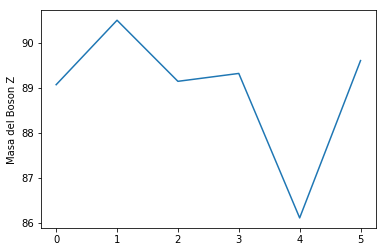

In [15]:
masa=[hist1.GetMean(),hist2.GetMean(),hist3.GetMean(),hist4.GetMean(),hist5.GetMean(),hist6.GetMean()]
plt.ylabel('Masa del Boson Z')
plt.plot(masa)
show()

In [16]:
print(np.mean(masa))
print(np.std(masa))

88.96418040303006
1.3598981227540192
